### Retrieval-Augmented Generation (RAG) with Large Language Models(LLMs)

RAG models combine the power of language models with external knowledge sources to provide more informed and accurate responses.

To implement the RAG Systems with LLMs the following steps were applied:

1. Data preparation:
- Study the data source and prepare the text for work. Divide the text into semantic parts (chunks) so that each chunk contains a complete thought or information block. The purpose of this step is to facilitate the process of text vectorization and improve the quality of information extraction.

2. Choosing an LLM model and a vector database:
- Determine which model from the Large Language Models family you will use to generate and vectorize text. Justify your choice.
- Select a suitable vector database for storing and retrieving embeddings. Explain why it is suitable for your task.

3. Implementation of the embedding extraction mechanism:
- Develop a process for vectorizing text chunks using the selected LLM model.
- Save the received embeddings in a vector database.
- Implement a mechanism for searching and extracting information from a database based on vector search. The system must accept the request, convert it into a vector, find the most relevant chunks and generate a response based on them.

4. System integration and testing:
- Integrate system components into a single architecture inside Jupyter Notebook.
- Test the system with examples of queries related to the content of the source document. Evaluate the quality of the responses you receive and make the necessary adjustments to the system.

### Notebook imports

In [216]:
import os
import fitz
import matplotlib.pyplot as plt
import numpy as np
import requests
from tqdm import tqdm
import random
import pandas as pd

### CONSTANTS

In [217]:
FILE_PATH = 'TECHNOLOGICAL AND NUCLEAR SUPERVISION.pdf'

### 1. Data Preparation

#### 1.1 import PDF Document

In [218]:
# Downloading the document
if not os.path.exists(FILE_PATH):
    print(f'[INFO] File not found. Downloading...')
    
    # PDF url
    url = "https://github.com/MamvotaTake/RAG-with-LLMs/blob/master/System/TECHNOLOGICAL AND NUCLEAR SUPERVISION.pdf"
    
    response = requests.get(url)
    
    filename = FILE_PATH
    if response.status_code == 200:
        with open(filename, 'wb') as file:
            file.write(response.content)
        print(f'[INFO] The file has been downloaded and saved as {filename}')
    else:
        print(f'[ERROR] The file could not be downloaded. Status code: {response.status_code}')
    
else:
    print(f'[INFO] The file {FILE_PATH} already exists')

[INFO] The file TECHNOLOGICAL AND NUCLEAR SUPERVISION.pdf already exists


### Reading the PDF

In [219]:
def text_formatter(text: str) -> str:
    """Text formatting"""
    cleaned_text = text.replace("\n", " ").strip()
    cleaned_text = cleaned_text.replace("--------------------", " ").strip()

    
    return cleaned_text


In [220]:
def open_and_read_pdf(file_path: str) -> list[dict]:
    document = fitz.open(file_path)
    
    
    
    pages_and_text = []
    
    for page_number, page in tqdm(enumerate(document)):
        text = page.get_text()
        text = text_formatter(text=text)
        pages_and_text.append({
            'page_number': page_number + 1, 
            'page_char_count': len(text), 
            'page_word_count':len(text.split(" ")),
            'page_sentence_count_row': len(text.split(". ")),
            'page_token_count': len(text) / 4,
            "text": text})
    return pages_and_text

In [221]:
pages_and_texts = open_and_read_pdf(file_path=FILE_PATH)
pages_and_texts[:2]

12it [00:00, 106.70it/s]


[{'page_number': 1,
  'page_char_count': 1362,
  'page_word_count': 223,
  'page_sentence_count_row': 16,
  'page_token_count': 340.5,
  'text': 'Зарегистрировано в Минюсте России 11 декабря 2020 г. N 61391       ФЕДЕРАЛЬНАЯ СЛУЖБА ПО ЭКОЛОГИЧЕСКОМУ,  ТЕХНОЛОГИЧЕСКОМУ И АТОМНОМУ НАДЗОРУ    ПРИКАЗ  от 20 октября 2020 г. N 420    ОБ УТВЕРЖДЕНИИ ФЕДЕРАЛЬНЫХ НОРМ И  ПРАВИЛ В ОБЛАСТИ ПРОМЫШЛЕННОЙ  БЕЗОПАСНОСТИ "ПРАВИЛА ПРОВЕДЕНИЯ  ЭКСПЕРТИЗЫ ПРОМЫШЛЕННОЙ  БЕЗОПАСНОСТИ"  (в ред. Приказа Ростехнадзора от 13.04.2022 N 120)    В соответствии со статьей 5 Федерального закона от 21 июля 1997 г. N 116-ФЗ "О  промышленной  безопасности  опасных  производственных  объектов"  (Собрание  законодательства Российской Федерации, 1997, N 30, ст. 3588; 2018, N 31, ст. 4860),  подпунктом 5.2.2.16(1) пункта 5 Положения о Федеральной службе по экологическому,  технологическому и атомному надзору, утвержденного постановлением Правительства  Российской Федерации от 30 июля 2004 г. N 401 "О Федеральной службе по

In [222]:
random.sample(pages_and_texts, k=3)

[{'page_number': 7,
  'page_char_count': 2577,
  'page_word_count': 336,
  'page_sentence_count_row': 15,
  'page_token_count': 644.25,
  'text': '<13> Пункт 3 статьи 2 Федерального закона от 21 июля 1997 г. N 116-ФЗ "О  промышленной безопасности опасных производственных объектов".    21. Экспертная организация приступает к проведению экспертизы после:  предоставления заказчиком необходимых для проведения экспертизы документов;  предоставления образцов технических устройств либо обеспечения доступа экспертов к  техническим устройствам, зданиям и сооружениям, применяемым на опасном  производственном объекте.  22. Заказчик обязан предоставить безопасный доступ экспертам, участвующим в  проведении экспертизы, к техническим устройствам, применяемым на опасном  производственном объекте, к зданиям и сооружениям опасных производственных  объектов, в отношении которых проводится экспертиза.  Эксперты, участвующие в проведении экспертизы, обязаны соблюдать положения  нормативных  правовых  акто

In [223]:
dataframe = pd.DataFrame(pages_and_texts)

In [224]:
dataframe

,page_number,page_char_count,page_word_count,page_sentence_count_row,page_token_count,text
0,1,1362,223,16,340.50,Зарегистрировано в Минюсте России 11 декабря 2...
1,2,2158,301,16,539.50,и атомному надзору от 20 октября 2020 г. N 42...
2,3,2135,310,18,533.75,<1> Пункт 2 статьи 7 Федерального закона от 21...
3,4,2158,305,9,539.50,2) иметь стаж работы не менее 10 лет по специа...
4,5,2209,310,18,552.25,"основании организации, в трудовых отношениях с..."
5,6,2480,347,20,620.00,проведению экспертизы промышленной безопасност...
6,7,2577,336,15,644.25,<13> Пункт 3 статьи 2 Федерального закона от 2...
7,8,2343,289,7,585.75,"расследования аварий и инцидентов, связанных с..."
8,9,2735,366,8,683.75,а) определение соответствия строительных конст...
9,10,2309,307,13,577.25,выполнению этих работ и учитывать результаты р...


In [225]:
dataframe.describe().round()

,page_number,page_char_count,page_word_count,page_sentence_count_row,page_token_count
count,12.0,12.0,12.0,12.0,12.0
mean,6.0,2232.0,307.0,13.0,558.0
std,4.0,385.0,44.0,4.0,96.0
min,1.0,1362.0,223.0,7.0,340.0
25%,4.0,2152.0,298.0,10.0,538.0
50%,6.0,2259.0,308.0,14.0,565.0
75%,9.0,2504.0,339.0,16.0,626.0
max,12.0,2735.0,366.0,20.0,684.0


### Text Processing (Splitting pages into sentences )

In [226]:
import spacy
from spacy.lang.ru import Russian

nlp = Russian()
nlp.add_pipe('sentencizer')

doc = nlp("Это предложение. Это другое предложение. дааа")
assert len(list(doc.sents)) == 3
list(doc.sents)

[Это предложение., Это другое предложение., дааа]

In [227]:
from spacy.lang.ru import Russian

nlp = Russian()
nlp.add_pipe("sentencizer")
doc = nlp("Это предложение. Это другое предложение.")
assert len(list(doc.sents)) == 2

In [228]:
list(doc.sents)

[Это предложение., Это другое предложение.]

In [229]:
for item in tqdm(pages_and_texts):
    item["sentence"] = list(nlp(item["text"]).sents)
    
    item["sentence"] = [str(sentence) for sentence in item["sentence"]]
    
    item["page_sentence_count_spacy"] = len(item['sentence'])

100%|██████████| 12/12 [00:00<00:00, 58.38it/s]


In [230]:
df = pd.DataFrame(pages_and_texts)

df.describe().round()

,page_number,page_char_count,page_word_count,page_sentence_count_row,page_token_count,page_sentence_count_spacy
count,12.0,12.0,12.0,12.0,12.0,12.0
mean,6.0,2232.0,307.0,13.0,558.0,11.0
std,4.0,385.0,44.0,4.0,96.0,4.0
min,1.0,1362.0,223.0,7.0,340.0,5.0
25%,4.0,2152.0,298.0,10.0,538.0,9.0
50%,6.0,2259.0,308.0,14.0,565.0,10.0
75%,9.0,2504.0,339.0,16.0,626.0,13.0
max,12.0,2735.0,366.0,20.0,684.0,17.0


In [231]:
random.sample(pages_and_texts, k=1)

[{'page_number': 12,
  'page_char_count': 1719,
  'page_word_count': 232,
  'page_sentence_count_row': 10,
  'page_token_count': 429.75,
  'text': 'о достаточности мер предотвращения проникновения на опасный производственный  объект посторонних лиц.  38. При проведении экспертизы обоснования безопасности опасного производственного  объекта или вносимых в него изменений в заключении экспертизы должны содержаться  следующие сведения:  оценка полноты и достоверности информации, представленной в обосновании  безопасности;  оценка полноты и достаточности мероприятий, компенсирующих отступления от норм и  правил в области промышленной безопасности;  оценка обоснованности результатов оценки риска аварий, в том числе адекватности  применяемых физико-математических моделей и использованных методов расчетов по  оценке риска, правильности и достоверности этих расчетов, а также полноты учета всех  факторов, влияющих на конечные результаты;  оценка учета современного опыта эксплуатации, капитальног

### Chunking Sentences 

In [232]:
num_sentence_chunk_size = 7

def split_list(input_list: list[str], slice_size: int=num_sentence_chunk_size) -> list[list[str]]:
    return [input_list[i:i+slice_size] for i in range(0, len(input_list), slice_size)]

In [233]:
test_list=list(range(10))
split_list(test_list)

[[0, 1, 2, 3, 4, 5, 6], [7, 8, 9]]

In [234]:
for item in tqdm(pages_and_texts):
    item["sentence_chunks"] = split_list(input_list=item["sentence"], slice_size=num_sentence_chunk_size)
    item["num_chunks"] = len(item["sentence_chunks"])

100%|██████████| 12/12 [00:00<?, ?it/s]


In [235]:
df = pd.DataFrame(pages_and_texts)
df.describe().round()

,page_number,page_char_count,page_word_count,page_sentence_count_row,page_token_count,page_sentence_count_spacy,num_chunks
count,12.0,12.0,12.0,12.0,12.0,12.0,12.0
mean,6.0,2232.0,307.0,13.0,558.0,11.0,2.0
std,4.0,385.0,44.0,4.0,96.0,4.0,1.0
min,1.0,1362.0,223.0,7.0,340.0,5.0,1.0
25%,4.0,2152.0,298.0,10.0,538.0,9.0,2.0
50%,6.0,2259.0,308.0,14.0,565.0,10.0,2.0
75%,9.0,2504.0,339.0,16.0,626.0,13.0,2.0
max,12.0,2735.0,366.0,20.0,684.0,17.0,3.0


In [236]:
import re

pages_chunks = []

for item in tqdm(pages_and_texts):
    for sentence_chunk in item['sentence_chunks']:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]
        
        joined_sentence_chunk = "".join(sentence_chunk).replace(" ", " ").strip()
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r' . \1', joined_sentence_chunk)
        
        chunk_dict["sentence_chunk"] = joined_sentence_chunk
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4
        
        pages_chunks.append(chunk_dict)

len(pages_chunks)
        

100%|██████████| 12/12 [00:00<00:00, 3997.75it/s]


24

In [237]:
random.sample(pages_chunks, k=1)

[{'page_number': 8,
  'sentence_chunk': 'расследования аварий и инцидентов, связанных с эксплуатацией технических устройств,  заключения экспертизы ранее проводимых экспертиз) и режимам эксплуатации  технических устройств (при наличии);  б) расчетные и аналитические процедуры оценки и прогнозирования технического  состояния технических устройств (в случаях, при которых проводится техническое  диагностирование технических устройств). 25.Техническое диагностирование технических устройств включает следующие  мероприятия:  а) визуальный и измерительный контроль;  б) оперативное (функциональное) диагностирование для получения информации о  состоянии, фактических параметрах работы, фактического нагружения технического  устройства в реальных условиях эксплуатации;  в) определение действующих повреждающих факторов, механизмов повреждения и  восприимчивости материала технического устройства к механизмам повреждения;  г) оценку качества соединений элементов технического устройства (при наличии);

In [238]:
df = pd.DataFrame(pages_chunks)

df.describe().round()

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,24.0,24.0,24.0,24.0
mean,7.0,1111.0,149.0,278.0
std,3.0,605.0,80.0,151.0
min,1.0,68.0,8.0,17.0
25%,4.0,851.0,108.0,213.0
50%,6.0,1133.0,146.0,283.0
75%,9.0,1342.0,183.0,335.0
max,12.0,2496.0,331.0,624.0


In [239]:
df["chunk_token_count"]

0     339.50
1     318.75
2     218.25
3     289.75
4     241.00
5     496.75
6      40.50
7     335.25
8     196.50
9      17.00
10    250.75
11    256.00
12    108.25
13    251.50
14    389.75
15    584.25
16    624.00
17     57.75
18    276.75
19    297.75
20    335.75
21    311.50
22    299.50
23    128.25
Name: chunk_token_count, dtype: float64

In [240]:
# Show random chunks with few tokens

min_token_length = 30
for row in df[df["chunk_token_count"] <= min_token_length].sample(1).iterrows():
    print(f'Chunk token count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]}')

Chunk token count: 17.0 | Text: Экспертизу проводят организации, имеющие лицензию на деятельность по


In [241]:
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient='records')
pages_and_chunks_over_min_token_len[:2]

[{'page_number': 1,
  'sentence_chunk': 'Зарегистрировано в Минюсте России 11 декабря 2020 г. N 61391       ФЕДЕРАЛЬНАЯ СЛУЖБА ПО ЭКОЛОГИЧЕСКОМУ,  ТЕХНОЛОГИЧЕСКОМУ И АТОМНОМУ НАДЗОРУ    ПРИКАЗ  от 20 октября 2020 г. N 420    ОБ УТВЕРЖДЕНИИ ФЕДЕРАЛЬНЫХ НОРМ И  ПРАВИЛ В ОБЛАСТИ ПРОМЫШЛЕННОЙ  БЕЗОПАСНОСТИ "ПРАВИЛА ПРОВЕДЕНИЯ  ЭКСПЕРТИЗЫ ПРОМЫШЛЕННОЙ  БЕЗОПАСНОСТИ"  (в ред.Приказа Ростехнадзора от 13.04.2022 N 120)    В соответствии со статьей 5 Федерального закона от 21 июля 1997 г. N 116-ФЗ "О  промышленной  безопасности  опасных  производственных  объектов"  (Собрание  законодательства Российской Федерации, 1997, N 30, ст. 3588; 2018, N 31, ст. 4860),  подпунктом 5.2.2.16(1) пункта 5 Положения о Федеральной службе по экологическому,  технологическому и атомному надзору, утвержденного постановлением Правительства  Российской Федерации от 30 июля 2004 г. N 401 "О Федеральной службе по  экологическому, технологическому и атомному надзору" (Собрание законодательства  Российской Федерации, 2

In [242]:
random.sample(pages_and_chunks_over_min_token_len[:2], k=1)

[{'page_number': 2,
  'sentence_chunk': 'и атомному надзору  от 20 октября 2020 г. N 420    ФЕДЕРАЛЬНЫЕ НОРМЫ И ПРАВИЛА В ОБЛАСТИ  ПРОМЫШЛЕННОЙ БЕЗОПАСНОСТИ "ПРАВИЛА  ПРОВЕДЕНИЯ ЭКСПЕРТИЗЫ ПРОМЫШЛЕННОЙ  БЕЗОПАСНОСТИ"  (в ред.Приказа Ростехнадзора от 13.04.2022 N 120)    I. Общие положения  1.Федеральные нормы и правила в области промышленной безопасности "Правила  проведения экспертизы промышленной безопасности" (далее - Правила) устанавливают  процедуру проведения экспертизы промышленной безопасности (далее - экспертиза),  требования к оформлению заключения экспертизы и требования к экспертам в области  промышленной безопасности (далее - эксперты). 2.Правила применяются при проведении экспертизы объектов, предусмотренных пунктом  1 статьи 13 Федерального закона от 21 июля 1997 г. N 116-ФЗ "О промышленной  безопасности опасных производственных объектов" (далее - объекты экспертизы). 3.Правила не применяются при проведении страховщиком экспертизы опасного объекта,  предусмотренной подпу

### Embedding our text chunks

In [243]:
from sentence_transformers import  SentenceTransformer

model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", device="cpu")


# Our sentences to encode
sentences = [
    "This framework generates embeddings for each input sentence",
    "Sentences are passed as a list of string.",
    "The quick brown fox jumps over the lazy dog."
]

# Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)
embeddings_dict = dict(zip(sentences, embeddings))

for sentence, embedding in embeddings_dict.items():
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")


Sentence: This framework generates embeddings for each input sentence
Embedding: [ 6.41694898e-03  7.04133278e-03 -2.81441882e-02  5.12471795e-02
 -8.93962290e-03  2.12669261e-02  2.30778214e-02 -1.44859795e-02
 -5.55315567e-03 -2.49297824e-02  4.53492776e-02  2.48959046e-02
 -3.07579301e-02  5.66224530e-02  6.32021725e-02 -5.62528148e-02
  5.16509973e-02  5.78279654e-03 -2.62116659e-02  1.31876033e-03
  1.99272446e-02 -1.30591542e-03 -2.28709728e-03  4.72541787e-02
 -3.72495390e-02 -2.85245404e-02 -4.10240367e-02 -1.57975964e-02
  3.17327026e-03 -8.74157355e-04 -2.96459235e-02  3.21501605e-02
  3.51344682e-02  1.09738503e-02  9.16706938e-07 -1.18588901e-03
 -2.53640581e-02 -7.92881008e-03 -5.09475684e-03  7.40655931e-03
  2.80068275e-02  1.06996130e-02  1.07513256e-02  2.76827961e-02
 -5.19132949e-02 -4.98179458e-02  5.34074157e-02  5.79068139e-02
  7.86073804e-02  7.73014724e-02 -1.01112220e-02 -6.35446012e-02
 -1.71579178e-02 -6.77370606e-03 -2.45816773e-03  2.61346009e-02
 -5.38514

In [244]:
embeddings[0].shape

(768,)

In [245]:
embedding = model.encode("I love my country Zimbabwe")

In [246]:
embedding

array([-4.83043976e-02,  4.72199358e-02, -2.44055148e-02, -3.05926930e-02,
        7.24962428e-02,  3.58064324e-02, -8.68245289e-02, -4.32700589e-02,
        3.14540304e-02,  6.89720139e-02, -4.16258425e-02,  1.82353216e-03,
       -2.50144228e-02, -1.03114080e-02, -2.08983403e-02, -2.91074887e-02,
        3.59858349e-02,  4.89756465e-03,  4.58061835e-03, -2.00140965e-03,
        2.78815273e-02,  2.71624662e-02, -1.09268250e-02, -3.72500308e-02,
       -1.60466339e-02,  7.23662600e-02, -2.46810168e-02,  3.53487441e-03,
        1.90085173e-02,  7.36252889e-02, -5.89208677e-02, -2.77738757e-02,
       -1.69175547e-02, -4.11270894e-02,  1.58989269e-06, -2.44368035e-02,
        2.72786058e-03,  5.58741437e-03, -1.88019499e-03,  2.39670556e-02,
        9.76968184e-03, -3.50689925e-02, -7.32370764e-02,  3.54666561e-02,
       -1.13242930e-02,  4.17570435e-02,  2.52554286e-02,  2.57616583e-02,
       -2.48266738e-02,  4.89518978e-03, -6.60897046e-03,  6.97325468e-02,
       -5.82832471e-02,  

In [247]:
%%time

model.to('cpu')

for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = model.encode(item["sentence_chunk"])

100%|██████████| 23/23 [00:45<00:00,  1.98s/it]

CPU times: total: 1min 14s
Wall time: 45.5 s


In [248]:
%%time

model.to('cuda')
for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = model.encode(item["sentence_chunk"])

AssertionError: Torch not compiled with CUDA enabled

In [249]:
import torch
torch.cuda.is_available()

False

In [250]:
%%time

text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]
text_chunks[13]

CPU times: total: 0 ns
Wall time: 986 µs


'При проведении экспертизы устанавливается полнота и достоверность относящихся к  объекту экспертизы документов, предоставленных заказчиком, оценивается фактическое  состояние технических устройств, зданий и сооружений на опасных производственных  объектах.При оценке фактического состояния технических устройств, зданий и  сооружений на опасных производственных объектах допускается использование  информации автоматизированных систем мониторинга их технического состояния. (в ред. Приказа Ростехнадзора от 13.04.2022 N 120)  Для оценки фактического состояния зданий и сооружений проводится их обследование. Техническое  диагностирование  технических  устройств  проводится  для  оценки  фактического состояния технических устройств в следующих случаях:  а) при проведении экспертизы по истечении срока службы или при превышении  количества циклов нагрузки такого технического устройства, установленных его  производителем, либо при отсутствии в технической документации данных о сроке  службы таког

In [251]:
len(text_chunks)

23

In [252]:
%%time

text_chunks_embeddings = model.encode(text_chunks, batch_size=8, convert_to_tensor=True)
text_chunks_embeddings

CPU times: total: 1min 19s
Wall time: 45.4 s


tensor([[ 0.0535, -0.0281,  0.0247,  ...,  0.0076, -0.0586, -0.0388],
        [ 0.0359, -0.0038, -0.0041,  ..., -0.0061, -0.0661, -0.0469],
        [ 0.0359, -0.0078,  0.0091,  ...,  0.0359, -0.0633, -0.0379],
        ...,
        [ 0.0115, -0.0053, -0.0088,  ...,  0.0085, -0.0896, -0.0495],
        [ 0.0120,  0.0079, -0.0150,  ...,  0.0272, -0.0345, -0.0486],
        [ 0.0366, -0.0421,  0.0236,  ...,  0.0266, -0.0514, -0.0310]])

### Save embeddings to file

In [253]:
text_chunks_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "text_chunks_embeddings_df.csv"
text_chunks_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [254]:
text_chunks_embeddings_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_embeddings_df_load.tail()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
18,10,<14> <14> Пункт 4 статьи 13 Федерального з...,1191,163,297.75,[ 5.18070161e-02 -3.33337039e-02 3.48287337e-...
19,11,6) сведения о рассмотренных в процессе эксперт...,1343,179,335.75,[ 2.74988413e-02 -2.38575544e-02 -1.05560636e-...
20,11,Приказа Ростехнадзора от 13.04.2022 N 120) 36...,1246,167,311.50,[ 1.15458407e-02 -5.34502929e-03 -8.75325128e-...
21,12,о достаточности мер предотвращения проникновен...,1198,151,299.50,[ 1.19670574e-02 7.87193701e-03 -1.50237177e-...
22,12,Заключение экспертизы представляется заказч...,513,74,128.25,[ 3.66069339e-02 -4.21204828e-02 2.36022919e-...


### RAG questions and answers

In [255]:
import torch
torch.cuda.is_available()

False

In [263]:
device = "cuda" if torch.cuda.is_available() else "cpu"

text_chunks_embeddings_df = pd.read_csv("text_chunks_embeddings_df.csv")

text_chunks_embeddings_df["embedding"] = text_chunks_embeddings_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

embeddings = torch.tensor(np.stack(text_chunks_embeddings_df["embedding"].tolist(), axis=0), 
                          dtype=torch.float32).to(device)



pages_chunks = text_chunks_embeddings_df.to_dict(orient="records")

text_chunks_embeddings_df

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,1,Зарегистрировано в Минюсте России 11 декабря 2...,1358,219,339.50,"[0.0535323136, -0.0281094573, 0.0246506743, -0..."
1,2,и атомному надзору от 20 октября 2020 г. N 42...,1275,183,318.75,"[0.0358644277, -0.00381869054, -0.00414434867,..."
2,2,"4.Техническое устройство, применяемое на опасн...",873,109,218.25,"[0.0358911119, -0.00777975423, 0.00913394894, ..."
3,3,<1> Пункт 2 статьи 7 Федерального закона от 21...,1159,161,289.75,"[0.0445177406, -0.0141640604, 0.0154662477, -0..."
4,3,Экспертом в области промышленной безопасности ...,964,138,241.00,"[0.023663681, -0.0499305092, -0.0115510616, -0..."
5,4,2) иметь стаж работы не менее 10 лет по специа...,1987,278,496.75,"[0.0674950778, -0.0207755137, 0.0147974202, -0..."
6,4,11.Эксперту запрещается участвовать в проведен...,162,19,40.50,"[0.0106533552, -0.0410195552, 0.0182790514, -0..."
7,5,"основании организации, в трудовых отношениях с...",1341,184,335.25,"[0.0400808416, -0.0236778762, 0.0302355494, -0..."
8,5,Проведение экспертизы 13.Экспертиза проводитс...,786,106,196.50,"[0.0244330578, -0.0303366818, 0.0165821593, -0..."
9,6,проведению экспертизы промышленной безопасност...,1003,142,250.75,"[0.0304777697, -0.0152265513, 0.0193826314, -0..."


In [257]:
text_chunks_embeddings_df["embedding"]

0     [0.0535323136, -0.0281094573, 0.0246506743, -0...
1     [0.0358644277, -0.00381869054, -0.00414434867,...
2     [0.0358911119, -0.00777975423, 0.00913394894, ...
3     [0.0445177406, -0.0141640604, 0.0154662477, -0...
4     [0.023663681, -0.0499305092, -0.0115510616, -0...
5     [0.0674950778, -0.0207755137, 0.0147974202, -0...
6     [0.0106533552, -0.0410195552, 0.0182790514, -0...
7     [0.0400808416, -0.0236778762, 0.0302355494, -0...
8     [0.0244330578, -0.0303366818, 0.0165821593, -0...
9     [0.0304777697, -0.0152265513, 0.0193826314, -0...
10    [0.0269819498, -0.0125711309, 0.0199946873, -0...
11    [0.0276675746, -0.0415236726, 0.0222854652, -0...
12    [0.0339098834, -0.0423370302, 0.0198525358, -0...
13    [-0.000356080913, 0.00285561499, -0.0183240753...
14    [0.0403291285, -0.0662025958, -0.00505056372, ...
15    [0.0374090523, -0.0493795909, -0.0152238533, -...
16    [0.0313129649, -0.0668815821, 0.0171965715, -0...
17    [0.0388962962, -0.0660926476, 0.0203685369

In [258]:
embeddings = np.stack(text_chunks_embeddings_df["embedding"].tolist())
embeddings

array([[ 0.05353231, -0.02810946,  0.02465067, ...,  0.00760495,
        -0.05855552, -0.03878975],
       [ 0.03586443, -0.00381869, -0.00414435, ..., -0.00614697,
        -0.0661062 , -0.04689862],
       [ 0.03589111, -0.00777975,  0.00913395, ...,  0.03589476,
        -0.06334978, -0.0379268 ],
       ...,
       [ 0.01154584, -0.00534503, -0.00875325, ...,  0.00847574,
        -0.08960813, -0.04952159],
       [ 0.01196706,  0.00787194, -0.01502372, ...,  0.02719378,
        -0.03453099, -0.04857604],
       [ 0.03660693, -0.04212048,  0.02360229, ...,  0.0266029 ,
        -0.05139673, -0.03104591]])

### Create Model

In [259]:
from sentence_transformers import util, SentenceTransformer

model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", device=device)

In [265]:
# Define the query

query = "Требования к экспертам"
print(f"Query: {query}")

# Embed the query
query_embedding = model.encode(query, convert_to_tensor=True)

# Use Cosine similarity

from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time = timer()

print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds")


# Get top-k results

top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

Query: Требования к экспертам
[INFO] Time taken to get scores on 23 embeddings: 0.00064 seconds


torch.return_types.topk(
values=tensor([0.6841, 0.6517, 0.6289, 0.6021, 0.5978]),
indices=tensor([ 4, 10,  6, 17,  7]))

In [262]:
query_embedding.dtype

torch.float32

In [264]:
embeddings[0].dtype

torch.float32

In [266]:
pages_chunks[4]

{'page_number': 3,
 'sentence_chunk': 'Экспертом в области промышленной безопасности (далее - эксперт) является  физическое лицо, аттестованное в установленном Правительством Российской Федерации  порядке <2>, которое обладает специальными познаниями в области промышленной  безопасности, соответствует требованиям, установленным федеральными нормами и  правилами в области промышленной безопасности, и участвует в проведении экспертизы. <3>     <2> Положение об аттестации экспертов в области промышленной безопасности,  утвержденное постановлением Правительства Российской Федерации от 28 мая 2015 г. N  509 (Собрание законодательства Российской Федерации, 2015, N 23, ст. 3313; 2020, N 30,  ст. 4898) (далее - Положение). <3> Статья 1 Федерального закона от 21 июля 1997 г. N 116-ФЗ "О промышленной  безопасности опасных производственных объектов".   8.Эксперт первой категории <4> должен соответствовать следующим требованиям:     <4> Подпункт "а" пункта 16 Положения.   1) иметь высшее образован

In [267]:
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [270]:
query = "Экспертом в области промышленной безопасности"
print(f'Query: "{query}"\n')
print("Results:")

for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    print("Text:")
    print(pages_chunks[idx]["sentence_chunk"])
    print(f"Page Number: {pages_chunks[idx]['page_number']}")
    print("\n")

Query: "Экспертом в области промышленной безопасности"

Results:
Score: 0.6841
Text:
Экспертом в области промышленной безопасности (далее - эксперт) является  физическое лицо, аттестованное в установленном Правительством Российской Федерации  порядке <2>, которое обладает специальными познаниями в области промышленной  безопасности, соответствует требованиям, установленным федеральными нормами и  правилами в области промышленной безопасности, и участвует в проведении экспертизы. <3>     <2> Положение об аттестации экспертов в области промышленной безопасности,  утвержденное постановлением Правительства Российской Федерации от 28 мая 2015 г. N  509 (Собрание законодательства Российской Федерации, 2015, N 23, ст. 3313; 2020, N 30,  ст. 4898) (далее - Положение). <3> Статья 1 Федерального закона от 21 июля 1997 г. N 116-ФЗ "О промышленной  безопасности опасных производственных объектов".   8.Эксперт первой категории <4> должен соответствовать следующим требованиям:     <4> Подпункт "а" пу

In [274]:
import fitz

pdf_path = "TECHNOLOGICAL AND NUCLEAR SUPERVISION.pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(0+1)

img = page.get_pixmap(dpi=300)

doc.close()

img_array = np.frombuffer(img.samples_mv, dtype=np.uint8).reshape((img.h, img.w, img.n))

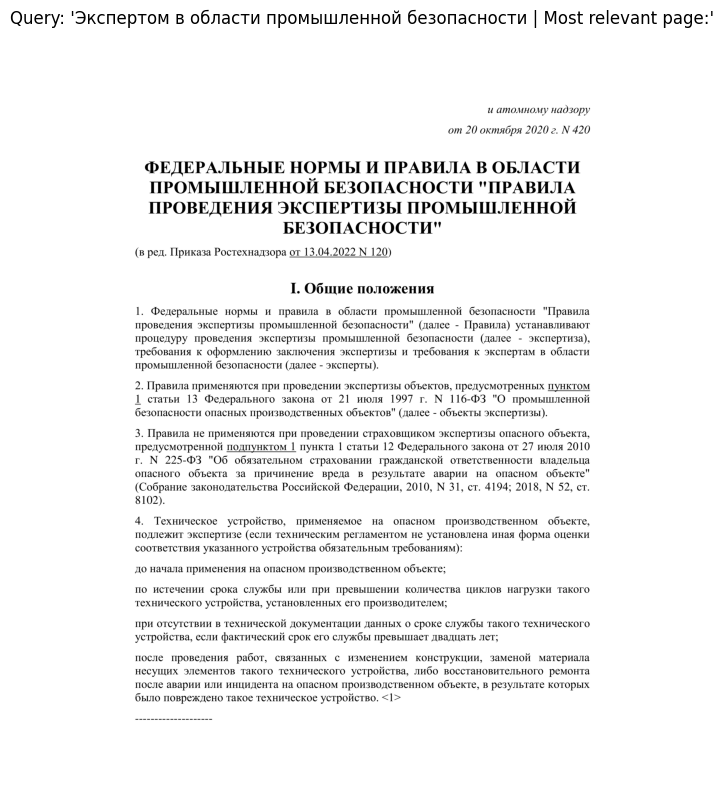

In [276]:
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query} | Most relevant page:'")
plt.axis("off")
plt.show()

### Similarity measures: dot product and cosine similarity

In [277]:
import torch

def dot_product(vector1, vector2):
    return torch.dot(vector1, vector2)

def cosine_similarity(vector1, vector2):
    dot_product = torch.dot(vector1, vector2)
    
    norm_vector1 = torch.sqrt(torch.sum(vector1**2))
    norm_vector2 = torch.sqrt(torch.sum(vector2**2))
    return dot_product / (norm_vector1 * norm_vector2)

In [281]:
vector1 = torch.tensor([1,2,3], dtype=torch.float32)
vector2 = torch.tensor([1,2,3], dtype=torch.float32)
vector3 = torch.tensor([5,6,7], dtype=torch.float32)
vector4 = torch.tensor([-1,-2,-3], dtype=torch.float32)

print("Dot Product between vector1 and vector2:", dot_product(vector1, vector2))
print("Dot Product between vector1 and vector3:", dot_product(vector1, vector3))
print("Dot Product between vector1 and vector4:", dot_product(vector1, vector4))

print("Cosine similarity between vector1 and vector2:", cosine_similarity(vector1, vector2))
print("Cosine similarity between vector1 and vector2:", cosine_similarity(vector1, vector3))
print("Cosine similarity between vector1 and vector2:", cosine_similarity(vector1, vector4))

Dot Product between vector1 and vector2: tensor(14.)
Dot Product between vector1 and vector3: tensor(38.)
Dot Product between vector1 and vector4: tensor(-14.)
Cosine similarity between vector1 and vector2: tensor(1.0000)
Cosine similarity between vector1 and vector2: tensor(0.9683)
Cosine similarity between vector1 and vector2: tensor(-1.0000)


In [282]:
model.encode('yo yo yo yo')

array([-1.01444703e-02,  5.50100990e-02, -1.33888982e-02, -4.72223423e-02,
        4.18512290e-03, -5.87422121e-03, -5.79338521e-02, -1.80964191e-02,
       -4.53029089e-02,  2.89553683e-02,  7.40413740e-03,  2.13010628e-02,
       -8.29928368e-03, -1.95699241e-02, -5.00301681e-02, -3.08089647e-02,
        1.70021076e-02, -4.17488953e-03, -6.51001558e-02,  1.59618091e-02,
       -6.79311296e-03,  1.53666884e-02,  7.50399306e-02,  1.15555292e-02,
       -6.79928586e-02, -8.11155234e-03,  2.97801960e-02,  2.91675255e-02,
       -5.73381670e-02, -5.13360985e-02, -4.83200401e-02,  2.48894282e-02,
       -1.50731066e-02,  2.59382334e-02,  2.37135851e-06, -2.63660066e-02,
       -1.36303040e-03,  3.35457250e-02, -7.08764279e-03,  2.75740195e-02,
       -7.21941143e-02,  1.74376313e-02,  2.85162814e-02, -1.99056510e-03,
       -2.46133748e-02, -2.67570652e-02,  7.09158462e-03,  3.41335102e-03,
        8.69130436e-03, -2.40381472e-02,  1.41622508e-02, -3.09719015e-02,
       -8.10874179e-02, -

### Functionizing our sementic search pipeline

In [286]:
def retrieve_relevant_resources(query: str, embeddings: torch.tensor, model: SentenceTransformer=model, n_resources_to_return: int=5, print_time: bool= True):
    """Embeds a query with model and returns top k scores and indices from embeddings"""
    
    #Embed the query
    query_embedding = model.encode(query, convert_to_tensor=True)
    
    start_time = timer()
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()
    
    if print_time:
        print(f"[INFO] Time taken to get scores on ({len(embeddings)} embeddings: {end_time - start_time:.5f} seconds)")
    
    scores, indices = torch.topk(input=dot_scores, k=n_resources_to_return)
    
    return scores, indices

def print_top_results_and_scores(query: str, embeddings: torch.tensor, pages_chunks: list[dict]=pages_chunks, n_resources_to_return: int = 5):
    """Finds relevant passages given and prints them out along with their scores"""
    
    scores, indices= retrieve_relevant_resources(query=query, embeddings=embeddings, n_resources_to_return=n_resources_to_return)
    for score, idx in zip(scores, indices):
        print(f"Score: {score:.4f}")
        print("Text:")
        print(pages_chunks[idx]["sentence_chunk"])
        print(f"Page Number: {pages_chunks[idx]['page_number']}")
        print("\n")
    

In [287]:
query=" Федерального закона от 21 июля 1997 г. N 116-ФЗ"
retrieve_relevant_resources(query=" Федерального закона от 21 июля 1997 г. N 116-ФЗ", embeddings=embeddings)
print_top_results_and_scores(query=query, embeddings=embeddings)

[INFO] Time taken to get scores on (23 embeddings: 0.00005 seconds)
[INFO] Time taken to get scores on (23 embeddings: 0.00010 seconds)
Score: 0.6449
Text:
Зарегистрировано в Минюсте России 11 декабря 2020 г. N 61391       ФЕДЕРАЛЬНАЯ СЛУЖБА ПО ЭКОЛОГИЧЕСКОМУ,  ТЕХНОЛОГИЧЕСКОМУ И АТОМНОМУ НАДЗОРУ    ПРИКАЗ  от 20 октября 2020 г. N 420    ОБ УТВЕРЖДЕНИИ ФЕДЕРАЛЬНЫХ НОРМ И  ПРАВИЛ В ОБЛАСТИ ПРОМЫШЛЕННОЙ  БЕЗОПАСНОСТИ "ПРАВИЛА ПРОВЕДЕНИЯ  ЭКСПЕРТИЗЫ ПРОМЫШЛЕННОЙ  БЕЗОПАСНОСТИ"  (в ред.Приказа Ростехнадзора от 13.04.2022 N 120)    В соответствии со статьей 5 Федерального закона от 21 июля 1997 г. N 116-ФЗ "О  промышленной  безопасности  опасных  производственных  объектов"  (Собрание  законодательства Российской Федерации, 1997, N 30, ст. 3588; 2018, N 31, ст. 4860),  подпунктом 5.2.2.16(1) пункта 5 Положения о Федеральной службе по экологическому,  технологическому и атомному надзору, утвержденного постановлением Правительства  Российской Федерации от 30 июля 2004 г. N 401 "О Федеральной 

### Getting an LLM for local generation

In [289]:
torch.tensor([1]).dtype

torch.int64

### Checking our local GPU memory available

In [291]:
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU memory: {gpu_memory_gb} GB")

AssertionError: Torch not compiled with CUDA enabled